In [1]:
from   sklearn.linear_model    import LinearRegression
from   sklearn.metrics         import mean_squared_error, r2_score
import scipy.stats             as     stats
import statsmodels.api         as     sm
import pandas                  as     pd
import numpy                   as     np
import seaborn                 as     sns
import matplotlib.pyplot       as     plt
import warnings
sns.set(color_codes=True)
warnings.filterwarnings('ignore')

# Dummy Encoding

In [4]:
medals = pd.read_csv('final_medal.csv')
print(medals.shape)
medals.drop("Unnamed: 0", axis = 1, inplace = True)
medals.head()

(3837, 16)


,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes,Athletes per Event
0,1896,1,1896 Summer,0,AUS,Australia,1,0,2,5,3,2,0,1,0.200
1,1896,1,1896 Summer,0,AUT,Austria,3,0,3,8,5,2,1,2,0.375
2,1896,1,1896 Summer,0,DEN,Denmark,3,0,5,12,6,1,2,3,0.250
3,1896,1,1896 Summer,0,FRA,France,12,0,6,18,11,5,4,2,0.667
4,1896,1,1896 Summer,0,GBR,UK,10,0,7,19,9,3,3,3,0.526


In [5]:
# create dummy variables
model        = pd.get_dummies(data=medals, columns=['NOC'])
model['NOC'] = medals['NOC']
print(model.shape)
model.head()

(3837, 245)


,Year,Summer,Games,Host,Region,Athletes,Females,Sports,Events,Medals,...,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM,NOC
0,1896,1,1896 Summer,0,Australia,1,0,2,5,3,...,0,0,0,0,0,0,0,0,0,AUS
1,1896,1,1896 Summer,0,Austria,3,0,3,8,5,...,0,0,0,0,0,0,0,0,0,AUT
2,1896,1,1896 Summer,0,Denmark,3,0,5,12,6,...,0,0,0,0,0,0,0,0,0,DEN
3,1896,1,1896 Summer,0,France,12,0,6,18,11,...,0,0,0,0,0,0,0,0,0,FRA
4,1896,1,1896 Summer,0,UK,10,0,7,19,9,...,0,0,0,0,0,0,0,0,0,GBR


# Train / Test Split

In [6]:
model = model[model['Year'] >= 1992]
model = model.reset_index().drop(['index'], axis=1)
print(model.shape)
model.head()

(1913, 245)


,Year,Summer,Games,Host,Region,Athletes,Females,Sports,Events,Medals,...,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM,NOC
0,1992,1,1992 Summer,0,Curacao,4,1,3,4,0,...,0,0,0,0,0,0,0,0,0,AHO
1,1992,1,1992 Summer,0,Albania,7,2,4,8,0,...,0,0,0,0,0,0,0,0,0,ALB
2,1992,1,1992 Summer,0,Algeria,35,2,7,27,2,...,0,0,0,0,0,0,0,0,0,ALG
3,1992,1,1992 Summer,0,Andorra,8,1,5,5,0,...,0,0,0,0,0,0,0,0,0,AND
4,1992,1,1992 Summer,0,Angola,28,3,6,21,0,...,0,0,0,0,0,0,0,0,0,ANG


In [14]:
y = model[['Medals','Golds','Silvers','Bronzes','Year','NOC','Region']]
print(y.shape)
y.head()

(1913, 7)


,Medals,Golds,Silvers,Bronzes,Year,NOC,Region
0,0,0,0,0,1992,AHO,Curacao
1,0,0,0,0,1992,ALB,Albania
2,2,1,0,1,1992,ALG,Algeria
3,0,0,0,0,1992,AND,Andorra
4,0,0,0,0,1992,ANG,Angola


In [12]:
model.columns

Index(['Year', 'Summer', 'Games', 'Host', 'Region', 'Athletes', 'Females',
       'Sports', 'Events', 'Medals',
       ...
       'NOC_VIN', 'NOC_VNM', 'NOC_WIF', 'NOC_YAR', 'NOC_YEM', 'NOC_YMD',
       'NOC_YUG', 'NOC_ZAM', 'NOC_ZIM', 'NOC'],
      dtype='object', length=245)

In [32]:
X = model[['Year','NOC','Region','Summer','Host','Athletes','Events','Athletes per Event', 
           'NOC_USA','NOC_GER','NOC_GBR','NOC_FRA','NOC_ITA',
           'NOC_SWE','NOC_CHN','NOC_RUS','NOC_AUS','NOC_HUN',
           'NOC_JPN']]
print(X.shape)
X.head()

(1913, 19)


,Year,NOC,Region,Summer,Host,Athletes,Events,Athletes per Event,NOC_USA,NOC_GER,NOC_GBR,NOC_FRA,NOC_ITA,NOC_SWE,NOC_CHN,NOC_RUS,NOC_AUS,NOC_HUN,NOC_JPN
0,1992,AHO,Curacao,1,0,4,4,1.000,0,0,0,0,0,0,0,0,0,0,0
1,1992,ALB,Albania,1,0,7,8,0.875,0,0,0,0,0,0,0,0,0,0,0
2,1992,ALG,Algeria,1,0,35,27,1.296,0,0,0,0,0,0,0,0,0,0,0
3,1992,AND,Andorra,1,0,8,5,1.600,0,0,0,0,0,0,0,0,0,0,0
4,1992,ANG,Angola,1,0,28,21,1.333,0,0,0,0,0,0,0,0,0,0,0


In [33]:
X_train = X[X['Year'] <  2016]
X_test  = X[X['Year'] == 2016]
X_test  = X_test.reset_index().drop(['index'], axis=1)
print(X_train.shape)
print(X_test.shape)

y_train = y[y['Year'] <  2016]
y_test  = y[y['Year'] == 2016]
y_test  = y_test.reset_index().drop(['index'], axis=1)
print(y_train.shape)
print(y_test.shape)

(1706, 19)
(207, 19)
(1706, 7)
(207, 7)


In [68]:
X_train.to_csv("train.csv")

# Linear Regression Training Model

In [35]:
# Create linear regression objects
regr_golds   = LinearRegression()
regr_silvers = LinearRegression()
regr_bronzes = LinearRegression()

In [36]:
# Train the models using the training sets
regr_golds.fit(  X_train.drop(['Year','NOC','Region'], axis=1), y_train['Golds'])
regr_silvers.fit(X_train.drop(['Year','NOC','Region'], axis=1), y_train['Silvers'])
regr_bronzes.fit(X_train.drop(['Year','NOC','Region'], axis=1), y_train['Bronzes'])

LinearRegression()

In [37]:
# Make predictions using the training sets
y_train['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(X_train.drop(['Year','NOC','Region'], axis=1)), columns=['Golds Prediction'])
y_train['Golds Prediction']   = y_train['Golds Prediction'].astype('int64')
y_train['Golds Prediction']   = y_train['Golds Prediction'].clip(lower=0)

y_train['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(X_train.drop(['Year','NOC','Region'], axis=1)), columns=['Silvers Prediction'])
y_train['Silvers Prediction'] = y_train['Silvers Prediction'].astype('int64')
y_train['Silvers Prediction'] = y_train['Silvers Prediction'].clip(lower=0)

y_train['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(X_train.drop(['Year','NOC','Region'], axis=1)), columns=['Bronzes Prediction'])
y_train['Bronzes Prediction'] = y_train['Bronzes Prediction'].astype('int64')
y_train['Bronzes Prediction'] = y_train['Bronzes Prediction'].clip(lower=0)

y_train['Medals Prediction']  = y_train['Golds Prediction'] + y_train['Silvers Prediction'] + y_train['Bronzes Prediction']
y_train.head()

,Medals,Golds,Silvers,Bronzes,Year,NOC,Region,Golds Prediction,Silvers Prediction,Bronzes Prediction,Medals Prediction
0,0,0,0,0,1992,AHO,Curacao,0,0,0,0
1,0,0,0,0,1992,ALB,Albania,0,0,0,0
2,2,1,0,1,1992,ALG,Algeria,0,0,0,0
3,0,0,0,0,1992,AND,Andorra,0,0,0,0
4,0,0,0,0,1992,ANG,Angola,0,0,0,0


In [38]:
# Intercepts
print(regr_golds.intercept_)
print(regr_silvers.intercept_)
print(regr_bronzes.intercept_)

0.7167437705950448
0.3991986174033375
0.2729645671920211


In [40]:
# The coefficients
columns                          = X_train.columns.drop(['Year','NOC','Region'])
features                         = pd.DataFrame(columns.T, columns=['Feature'])
features['Golds Coefficients']   = regr_golds.coef_.T
features['Silvers Coefficients'] = regr_silvers.coef_.T
features['Bronzes Coefficients'] = regr_bronzes.coef_.T

features = features.sort_values(by='Golds Coefficients', ascending=False).reset_index().drop(['index'],axis=1)
features

,Feature,Golds Coefficients,Silvers Coefficients,Bronzes Coefficients
0,NOC_CHN,7.968399,5.029064,2.982672
1,NOC_USA,6.788325,6.281841,4.783533
2,NOC_RUS,5.919179,5.197119,6.039382
3,NOC_GER,3.479711,3.980763,3.708717
4,Host,1.320493,-1.763001,-3.704893
5,NOC_HUN,1.099404,0.147483,-0.821976
6,Athletes,0.069482,0.050748,0.045882
7,Summer,-0.051319,-0.116496,-0.065479
8,Events,-0.056556,-0.027432,-0.013373
9,NOC_FRA,-0.354284,0.028488,2.006527


# Rio 2016 Validation Test Set

In [67]:
print(X_test.shape)
X_test.to_csv("test.csv")

(207, 19)


In [42]:
# Make predictions using the test set
y_test['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(X_test.drop(['Year','NOC','Region'], axis=1)), columns=['Golds Prediction'])
y_test['Golds Prediction']   = y_test['Golds Prediction'].astype('int64')
y_test['Golds Prediction']   = y_test['Golds Prediction'].clip(lower=0)

y_test['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(X_test.drop(['Year','NOC','Region' ], axis=1)), columns=['Silvers Prediction'])
y_test['Silvers Prediction'] = y_test['Silvers Prediction'].astype('int64')
y_test['Silvers Prediction'] = y_test['Silvers Prediction'].clip(lower=0)

y_test['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(X_test.drop(['Year','NOC','Region'], axis=1)), columns=['Bronzes Prediction'])
y_test['Bronzes Prediction'] = y_test['Bronzes Prediction'].astype('int64')
y_test['Bronzes Prediction'] = y_test['Bronzes Prediction'].clip(lower=0)

y_test['Medals Prediction']  = y_test['Golds Prediction'] + y_test['Silvers Prediction'] + y_test['Bronzes Prediction']
y_test.head()

,Medals,Golds,Silvers,Bronzes,Year,NOC,Region,Golds Prediction,Silvers Prediction,Bronzes Prediction,Medals Prediction
0,0,0,0,0,2016,AFG,Afghanistan,0,0,0,0
1,0,0,0,0,2016,ALB,Albania,0,0,0,0
2,2,0,2,0,2016,ALG,Algeria,1,1,1,3
3,0,0,0,0,2016,AND,Andorra,0,0,0,0
4,0,0,0,0,2016,ANG,Angola,0,0,0,0


In [43]:
rio_2016_medals = medals[medals['Games'] == '2016 Summer']
rio_2016_medals = y_test[['NOC','Medals Prediction']].merge(rio_2016_medals, on='NOC')
rio_2016_medals = rio_2016_medals.sort_values(by='Medals Prediction', ascending=False)
rio_2016_medals.head()

,NOC,Medals Prediction,Year,Summer,Games,Host,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes,Athletes per Event
198,USA,82,2016,1,2016 Summer,0,USA,555,291,33,245,121,46,37,38,2.265
38,CHN,57,2016,1,2016 Summer,0,China,390,240,32,209,70,26,18,26,1.866
72,GER,56,2016,1,2016 Summer,0,Germany,418,194,29,217,42,17,10,15,1.926
26,BRA,46,2016,1,2016 Summer,1,Brazil,462,207,34,222,19,7,6,6,2.081
159,RUS,44,2016,1,2016 Summer,0,Russia,284,142,29,181,56,19,17,20,1.569


In [17]:
hover_text = []
color_range = []
for index, row in rio_2016_medals.iterrows():
    hover_text.append(('Games: {games}<br>'+
                       'Host: {host}<br>'+
                       'NOC: {noc}<br>'+
                       'Region: {region}<br>'+
                       'Athletes: {athletes}<br>'+
                       'Females: {females}<br>'+
                       'Sports: {sports}<br>'+
                       'Events: {events}<br>'+
                       'Athletes per Event: {ape}<br>'+
                       'Medals: {medals}<br>'+
                       'Medals Prediction: {medals_pred}<br>'+
                       'Golds: {golds}<br>'+
                       'Silvers: {silvers}<br>'+
                       'Bronzes: {bronzes}').format(games       = row['Games'],
                                                    host        = row['Host'],
                                                    noc         = row['NOC'],
                                                    region      = row['Region'],
                                                    athletes    = row['Athletes'],
                                                    females     = row['Females'],
                                                    sports      = row['Sports'],
                                                    events      = row['Events'],
                                                    ape         = row['Athletes per Event'],
                                                    medals      = row['Medals'],
                                                    medals_pred = row['Medals Prediction'],
                                                    golds       = row['Golds'],
                                                    silvers     = row['Silvers'],
                                                    bronzes     = row['Bronzes']))
    color_range.append(max(row['Events'],100))

trace0 = go.Scatter(
    x      = rio_2016_medals['Medals'],
    y      = rio_2016_medals['Medals Prediction'],
    text   = hover_text,
    mode   = 'markers',
    marker = dict(
        size          = rio_2016_medals['Athletes']/10,
        color         = color_range,
        showscale     = True,
        reversescale  = True,
        colorscale    = 'RdBu',
        colorbar      = dict(
                title = 'Total<br>Events'
            )
    )
)

data      = [trace0]
layout    = go.Layout(
    title = 'Medal Table of the Rio 2016 Summer Olympic Games',
    xaxis = dict(
        title         = 'Total Number of Actual Medals by Nation',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    yaxis = dict(
        title         = 'Total Number of Predicted Medals by Nation',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor  = 'rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'rio-2016-olympic-medals')

In [44]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train['Medals'], y_train['Medals Prediction']))
print('Variance score: %.2f' % r2_score(y_test['Medals'],  y_test['Medals Prediction']))

Variance score: 0.85
Variance score: 0.82


In [45]:
# The mean squared error
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train['Medals'], y_train['Medals Prediction'])))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test['Medals'],  y_test['Medals Prediction'])))

Root mean squared error: 4.43
Root mean squared error: 5.44


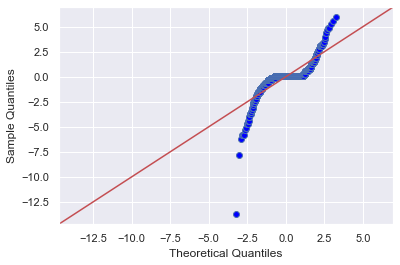

In [46]:
residuals = y_train['Medals Prediction'] - y_train['Medals']
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Tokyo 2020 Prediction

In [47]:
previous_medals = medals[medals['Year'] >= 2008]
previous_medals = previous_medals[previous_medals['Summer'] == 1]
previous_medals = previous_medals.groupby(
    ['NOC','Region'])['Athletes','Females','Sports','Events'].mean().astype('int64')
previous_medals = previous_medals.reset_index()
print(previous_medals.shape)
previous_medals.sort_values(by='Athletes',ascending=False).head()

(209, 6)


,NOC,Region,Athletes,Females,Sports,Events
200,USA,USA,557,280,32,249
39,CHN,China,446,242,31,224
11,AUS,Australia,419,198,30,207
73,GER,Germany,407,182,28,212
69,GBR,UK,398,185,27,210


In [48]:
# copy Rio 2016 variables and update year
tokyo_2020_medals         = X_test
tokyo_2020_medals['Year'] = 2020

# change host to Japan
tokyo_2020_medals['Host']                                        = 0
tokyo_2020_medals.loc[tokyo_2020_medals['NOC'] == 'JPN', 'Host'] = 1

# update 2020 Athletes, Females, Sports and Events based on mean between 2008 and 2016
tokyo_2020_medals = tokyo_2020_medals.drop(['Athletes','Events'],axis=1)
tokyo_2020_medals = tokyo_2020_medals.merge(previous_medals)

# zero Athletes if no Events
tokyo_2020_medals.loc[tokyo_2020_medals['Events'] == 0, 'Athletes'] = 0

# update Athletes per Event
tokyo_2020_medals['Athletes per Event'] = tokyo_2020_medals['Athletes'] / tokyo_2020_medals['Events']
tokyo_2020_medals['Athletes per Event'] = (tokyo_2020_medals['Athletes per Event'].fillna(0)).round(3)

# reorder features
tokyo_2020_medals = tokyo_2020_medals[['Year','NOC','Region',
                                       'Summer','Host','Athletes','Events','Athletes per Event', 
                                       'NOC_USA','NOC_GER','NOC_GBR','NOC_FRA','NOC_ITA',
                                       'NOC_SWE','NOC_CHN','NOC_RUS','NOC_AUS','NOC_HUN',
                                       'NOC_JPN']]

print(tokyo_2020_medals.shape)
tokyo_2020_medals.sort_values(by='Athletes',ascending=False).head()

(207, 19)


,Year,NOC,Region,Summer,Host,Athletes,Events,Athletes per Event,NOC_USA,NOC_GER,NOC_GBR,NOC_FRA,NOC_ITA,NOC_SWE,NOC_CHN,NOC_RUS,NOC_AUS,NOC_HUN,NOC_JPN
198,2020,USA,USA,1,0,557,249,2.237,1,0,0,0,0,0,0,0,0,0,0
38,2020,CHN,China,1,0,446,224,1.991,0,0,0,0,0,0,1,0,0,0,0
10,2020,AUS,Australia,1,0,419,207,2.024,0,0,0,0,0,0,0,0,1,0,0
72,2020,GER,Germany,1,0,407,212,1.920,0,1,0,0,0,0,0,0,0,0,0
68,2020,GBR,UK,1,0,398,210,1.895,0,0,1,0,0,0,0,0,0,0,0


In [49]:
tokyo_2020_medals.describe()

,Year,Summer,Host,Athletes,Events,Athletes per Event,NOC_USA,NOC_GER,NOC_GBR,NOC_FRA,NOC_ITA,NOC_SWE,NOC_CHN,NOC_RUS,NOC_AUS,NOC_HUN,NOC_JPN
count,207.0,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,2020.0,1.0,0.004831,52.154589,33.874396,1.247599,0.004831,0.004831,0.004831,0.004831,0.004831,0.004831,0.004831,0.004831,0.004831,0.004831,0.004831
std,0.0,0.0,0.069505,94.030130,50.826888,0.453252,0.069505,0.069505,0.069505,0.069505,0.069505,0.069505,0.069505,0.069505,0.069505,0.069505,0.069505
min,2020.0,1.0,0.000000,1.000000,1.000000,0.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,1.0,0.000000,5.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,1.0,0.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.0,1.0,0.000000,53.500000,41.500000,1.373500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.0,1.0,1.000000,557.000000,249.000000,3.625000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Make predictions using the Tokyo 2020 set
y_2020                       = tokyo_2020_medals[['Year','NOC','Region']]

y_2020['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(tokyo_2020_medals.drop(['Year','NOC','Region'], axis=1)), columns=['Golds Prediction'])
y_2020['Golds Prediction']   = y_2020['Golds Prediction'].astype('int64')
y_2020['Golds Prediction']   = y_2020['Golds Prediction'].clip(lower=0)

y_2020['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(tokyo_2020_medals.drop(['Year','NOC','Region'], axis=1)), columns=['Silvers Prediction'])
y_2020['Silvers Prediction'] = y_2020['Silvers Prediction'].astype('int64')
y_2020['Silvers Prediction'] = y_2020['Silvers Prediction'].clip(lower=0)

y_2020['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(tokyo_2020_medals.drop(['Year','NOC','Region'], axis=1)), columns=['Bronzes Prediction'])
y_2020['Bronzes Prediction'] = y_2020['Bronzes Prediction'].astype('int64')
y_2020['Bronzes Prediction'] = y_2020['Bronzes Prediction'].clip(lower=0)

y_2020['Medals Prediction']  = y_2020['Golds Prediction'] + y_2020['Silvers Prediction'] + y_2020['Bronzes Prediction']
y_2020.head()

,Year,NOC,Region,Golds Prediction,Silvers Prediction,Bronzes Prediction,Medals Prediction
0,2020,AFG,Afghanistan,0,0,0,0
1,2020,ALB,Albania,0,0,0,0
2,2020,ALG,Algeria,0,1,1,2
3,2020,AND,Andorra,0,0,0,0
4,2020,ANG,Angola,0,0,0,0


In [72]:
tokyo_2020_medals = y_2020.merge(tokyo_2020_medals, on=['Year','NOC','Region'])
tokyo_2020_medals = tokyo_2020_medals.sort_values(by='Medals Prediction', ascending=False).reset_index()
tokyo_2020_medals[['NOC','Region','Host','Athletes','Events','Athletes per Event',
                   'Golds Prediction','Silvers Prediction','Bronzes Prediction']]

ValueError: cannot insert level_0, already exists

In [73]:
tokyo_2020_medals.sort_values(by = "Medals Prediction", ascending = False)[["Region", "Medals Prediction"]].reset_index(drop = True).to_csv("Submission.csv")

In [82]:
tokyo_2020_medals.sort_values(by = "Medals Prediction", ascending = False)[["Region", "Medals Prediction"]].reset_index(drop = True, inplace = True)
tokyo_2020_medals[["Region", "Medals Prediction"]].sort_values(by = "Medals Prediction", ascending = False).head(40).reset_index(drop = True)

,Region,Medals Prediction
0,USA,82
1,China,64
2,Russia,57
3,Germany,54
4,Australia,42
5,UK,40
6,France,36
7,Brazil,35
8,Spain,31
9,Canada,31
